<h1>Introdução</h1>

<p>No contexto de inteligência artificial e aprendizagem de máquina, uma rede neural convolucional (CNN do inglês Convolutional Neural network ou ConvNet) é uma classe de rede neural artificial do tipo feed-forward, que vem sendo aplicada com sucesso no processamento e análise de imagens digitais.[1] </p>
<p>Uma CNN usa uma variação de perceptrons multicamada desenvolvidos de modo a demandar o mínimo pré-processamento possível. Essas redes também são conhecidas como redes neurais artificiais invariantes a deslocamento (shift invariant) ou invariantes a espaço (space invariant), em ambos os casos representadas pela sigla em inglês SIANN.[2][3]</p>
<img src="img/conv_img.jpeg">
<p>Uma imagem preta e branca (grayscale) é representada como uma matrix 2D, em que cada posição da matrix representa um pixel da imagem. Os valores para cada elemento variam entre 0 (preto) até 255 (branco), conforme o exemplo abaixo.Já uma imagem colorida, é normalmente representada por uma matrix 3D de forma que seja possível armazenar uma combinação das cores vermelho, verde e azul (RGB do inglês).</p>
<img src="img/gray_img.jpeg">

<h3>Convoluções</h3>
<p>Matematicamente, uma convolução é uma operação linear que a partir de duas funções, gera uma terceira (normalmente chamada de feature map). No contexto de imagens, podemos entender esse processo como um filtro/kernel que transforma uma imagem de entrada.
Um kernel é uma matrix utilizada para uma operação de multiplicação de matrizes. Esta operação é aplicada diversas vezes em diferentes regiões da imagem. A cada aplicação, a região é alterada por um parâmetro conhecido como stride. Normalmente o stride possui o valor 1, o que significa que a transformação será aplicada em todos os pixels da imagem. Um exemplo dessa transformação é ilustrado abaixo.</p>

<img src="img/conv_.gif">

<h3> Padding </h3>
<p>Padding é um processo em que alguns pixels são adicionados ao redor da imagem antes da operação de convolução, de forma a manter a dimensionalidade na imagem resultante durante a operação.</p>
<img src="img/padding.png">
<p>Algumas das operações de convolução mais utilizadas com imagens são apresentadas abaixo.</p>
<img src="img/operation_padding.png">
<p>Esse processo é utilizado porque essas imagens resultantes podem conter elementos que facilitam a identificação da classe alvo para a rede. Uma CNN utiliza esse processo nas suas camadas iniciais, com a diferença de que a matrix de kernel não possui valores “chumbados” como no exemplo acima, ou seja: eles são parâmetros treinados pelo algoritmo.</p>

<h3>ReLU</h3>
<p>Uma rede neural sem função de ativação torna-se um modelo linear. Se o seu problema é linear, existem outros modelos mais simples que te atenderão tão bem quanto uma rede neural. Infelizmente a maioria dos problemas complexos não são lineares. Portanto, para adicionar a não linearidade a rede, utilizamos as funções de ativação. Nos dias de hoje, e principalmente no contexto de imagens, a mais utilizada é a função ReLU.
Matematicamente a função ReLU é definida como y = max(0, x). O gráfico a seguir é a ilustração desta função.</p>
<img src="img/Relu.png">

<h3>Pooling</h3>
<p>Pooling é um processo de downsamping. É um processo simples de redução da dimensionalidade/features maps. Em uma forma leviana de pensar, podemos entender essa transformação como uma redução do tamanho da imagem.
A principal motivação dessa operação no modelo, é de diminuir sua variância a pequenas alterações e também de reduzir a quantidade de parâmetros treinados pela rede.</p>
<img src="img/Pooling.png">
<p>Existem 3 operações diferentes de Pooling (MaxPooling, SumPooling, AvaragePooling). Todas elas seguem o mesmo princípio e só se diferem na forma como calculam o valor final. A mais utilizada nos dias de hoje é a MaxPooling.
A operação de MaxPooling retira o maior elemento de determinada região da matrix (considerando o tamanho do pool aplicado). Posteriormente, é feito um deslizamento considerando um parâmetro de stride (similar a a operação de convolução) para aplicação de uma nova operação.</p>
<img src="img/Pooling_op.jpeg">

<h3>Dropout</h3>
<p>Dropout não é uma especificidade de uma CNN, porém a utilizaremos em nossa implementação técnica, portanto abordaremos seu funcionamento.
Em resumo, a camada de Dropout é utilizada para evitar que determinadas partes da rede neural tenham muita responsabilidade e consequentemente, possam ficar muito sensíveis a pequenas alterações.
Essa camada recebe um hyper-parâmetro que define uma probabilidade de “desligar” determinada área da rede neural durante o processo de treinamento.</p>
<img src="img/drop_out.png">

<h3>Flatten</h3>
<p>Essa camada normalmente é utilizada na divisão das 2 partes da CNN (extração de características / rede neural tradicional ). Ela basicamente opera uma transformação na matrix da imagem, alterando seu formato para um array. Por exemplo, uma imagem em grayscale de 28x28 será transformada para um array de 784 posições. A imagem abaixo ilustra essa operação.</p>
<img src="img/Flatting.png">

<h3>Rede Tradicional (Dense Layers) </h3>
<p>Rede neural é um modelo computacional baseado no sistema nervoso central humano. Elas são capazes de reconhecer padrões em uma massa de dados de forma a classificá-los em alguma categoria ou fazer a regressão de algum valor. </p>
<img src="img/dense_layer.png">

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

from IPython.display import HTML
import numpy as np
import SimpleITK as sitk
import cv2 as cv
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [27]:
image_size = 256       #resize all images to 256*256*

labels = ['Covid', 'Normal', 'PNEUMONIA (BACTERIA)', 'PNEUMONIA (VIRUS)']          #labels from the folders

In [28]:
def create_training_data(data_dir):              #creating the training data
    
    images = []
    
    for label in labels:
        dir = os.path.join(data_dir,label)
        class_num = labels.index(label)
        
        for image in os.listdir(dir):    #going through all the images in different folders and resizing them
            
            image_read = cv.imread(os.path.join(dir,image),cv.IMREAD_GRAYSCALE)
            image_resized = cv.resize(image_read,(image_size,image_size))
            images.append([image_resized,class_num])
            
    return np.array(images)

In [29]:
train = create_training_data(r'C:\Users\Megatron\Desktop\TCC\dados\train')
test = create_training_data(r'C:\Users\Megatron\Desktop\TCC\dados\test')

In [30]:
print('Training Shape',train.shape,'\nTesting Shape', test.shape)

Training Shape (5526, 2) 
Testing Shape (706, 2)


<p>Pneumonias são infecções que se instalam nos pulmões, órgãos duplos localizados um de cada lado da caixa torácica. Podem acometer a região dos alvéolos pulmonares onde desembocam as ramificações terminais dos brônquios e, às vezes, os interstícios (espaço entre um alvéolo e outro).</p>

</p>Basicamente, pneumonia é provocada pela penetração de um agente infeccioso ou irritante (bactérias, vírus, fungos e por reações alérgicas) no espaço alveolar, onde ocorre a troca gasosa. Esse local deve estar sempre muito limpo, livre de substâncias que possam impedir o contato do ar com o sangue</p>

<img src="img/raio_x_torax.png">

<h3>PNEUMONIA BACTERIANA</h3>

<p>Pode ser classificada em 3 grupos principais. De acordo com suas
características morfológicas: pneumonia lobar, broncopneumonia e pneumonia
intersticial aguda.</p>
<p>Essa classificação tem o seu uso limitado, pois as
características radiográficas se sobrepõem e não podem ser usadas para
confirmação de diagnóstico etiológico.Por esse motivo, muitos autores
preferem classificar pneumonias de acordo com o mecanismo de origem:
pneumonia adquirida na comunidade (PAC), pneumonia nosocomial e
pneumonia aspirativa.</p>
<p>Abordaremos a seguir a PAC, que é o grupo de
pneumonias mais prevalente nos atendimentos de emergência.
O achado usual na PAC coincide com a apresentação clássica da
pneumonia lobar: consolidação do espaço aéreo de um segmento ou lobo,
limitada pela superfície pleural (Figura 2).O Streptococcus pneumoniae é o
microorganismo mais frequente causador de PAC. Hoje em dia, o uso de
antibióticos mudou a aparência da pneumonia Pneumocócica, que pode
aparecer como áreas confluentes desiguais, multilobares ou bilaterais (Figura.
3a).</p>
<p>O Mycoplasma pneumoniae, outro importante agente causador de PAC,
pode se apresentar com sintomas de longa duração e um padrão de infiltração
reticulo-nodular difusa (Figura 3b).</p>
<img src="img/torax_bact.png">

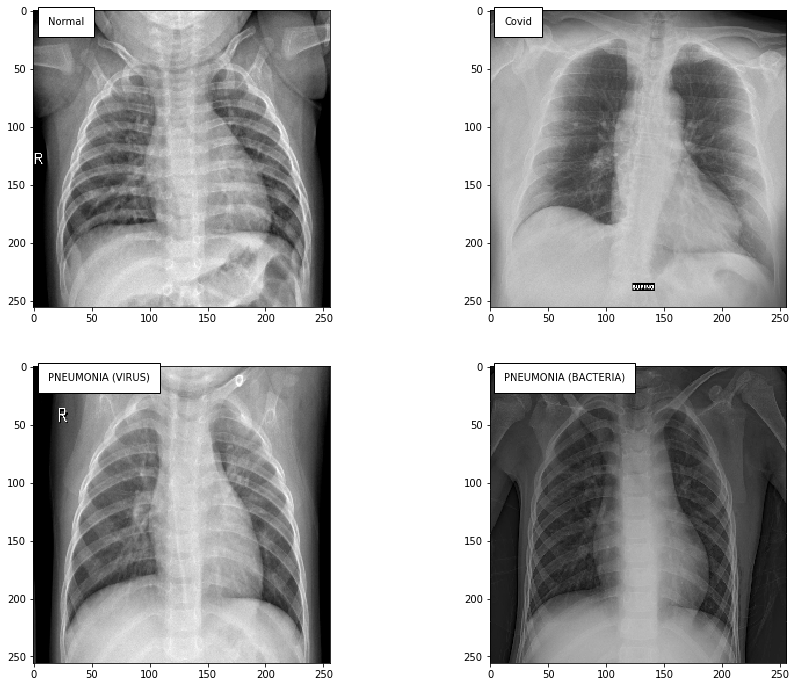

In [31]:
fig, ax = plt.subplots(2, 2,figsize=(15, 12) )
ax[0][0].imshow(train[1000][0], cmap='gray')
ax[0][0].text(12, 12, labels[train[1000][1]], bbox={'facecolor': 'white', 'pad': 10})
#Plot 2
ax[0][1].imshow(train[1][0], cmap='gray')
ax[0][1].text(12, 12, labels[train[1][1]], bbox={'facecolor': 'white', 'pad': 10})
#Plot 3
ax[1][0].imshow(train[5000][0], cmap='gray')
ax[1][0].text(12, 12, labels[train[5000][1]], bbox={'facecolor': 'white', 'pad': 10})
#Plot 4
ax[1][1].imshow(train[3000][0], cmap='gray')
ax[1][1].text(12, 12, labels[train[3000][1]], bbox={'facecolor': 'white', 'pad': 10})
plt.show();

In [32]:
X = []
y = []

for feature, label in train:
    X.append(feature)          #appending all images
    y.append(label)            #appending all labels

for feature, label in test:
    X.append(feature)
    y.append(label)
    

In [33]:
X_new = np.array(X).reshape(-1, image_size, image_size, 1)
y_new = np.array(y)
y_new = np.expand_dims(y_new, axis =1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.25, random_state = 42)

In [35]:
print('X Train Shape',X_train.shape,'\nX Test shape',X_test.shape, '\nY Train Shape',y_train.shape,'\nY Test Shape',y_test.shape)

X Train Shape (4674, 256, 256, 1) 
X Test shape (1558, 256, 256, 1) 
Y Train Shape (4674, 1) 
Y Test Shape (1558, 1)


In [36]:
np.unique(y_train)

array([0, 1, 2, 3])

In [63]:
X_train[0].shape

(256, 256, 1)

In [64]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train[0].shape ))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.3))


model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 256, 256, 32)      320       
_________________________________________________________________
activation_101 (Activation)  (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 128, 128, 32)      0         
Total params: 448
Trainable params: 384
Non-trainable params: 64
_________________________________________________________________


In [65]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [66]:
model_trained = model.fit(X_train, y_train,epochs=5,validation_data=(X_test, y_test))

ValueError: Error when checking target: expected max_pooling2d_22 to have 4 dimensions, but got array with shape (4674, 1)

### Treino
<p>Quanto menor o <i>loss </i>, melhor o modelo (a menos que o modelo tenha se ajustado demais aos dados de treinamento). A perda é calculada no treinamento e na validação e sua interoperação é o desempenho do modelo nesses dois conjuntos. Diferentemente da <i>Accuracy</i>, a perda não é uma porcentagem. É uma soma dos erros cometidos para cada exemplo nos conjuntos de treinamento ou validação. No caso de redes neurais, a perda é geralmente verossimilhança logarítmica negativa e soma dos quadrados residuais para classificação e regressão, respectivamente. Então, naturalmente, o objetivo principal de um modelo de aprendizado é reduzir (minimizar) o valor da <i>Cost Function</i> em relação aos parâmetros do modelo, alterando os valores do vetor de peso por meio de diferentes métodos de otimização, como a retropropagação em redes neurais. A<i> Cost Function</i> implica em quão bem ou mal um determinado modelo se comporta após cada iteração da otimização. Idealmente, seria de esperar a redução da perda após cada uma ou várias iterações. A <i>Accuracy</i> de um modelo é geralmente determinada depois que os parâmetros do modelo são aprendidos e corrigidos e nenhum aprendizado está ocorrendo. Em seguida, as amostras de teste são fornecidas ao modelo e o número de erros (<i>zero-one loss</i>) que o modelo faz é registrado, após comparação com os verdadeiros valores. Em seguida, é calculada a porcentagem de classificação incorreta.</p>

<h3>Precisão</h3>
<p>Porcentagem de identificações reais que estavam corretas (TP and TN)</p>
<h3>Recall </h3>
<p>Porporção de verdadeiros positivos que foram identificados corretamente</p>
<h3> F1-Score </h3>
<p>O F1-score combina o recall com a precisão de modo que tragam um único número.</p>
<br>
<p>Em todos modelos sempre tentamos buscar a harmonização entre Precisão e Recall </p>
<img src="img/Harmony.png">

## Referencias 
##### Documentações https://keras.io/getting_started/faq/

##### Dataset : https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia and https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset

##### kaggle : https://www.kaggle.com/arjunsarkar/cnn-tensorflow-2-0-f-score-97-recall-98

##### Artigos : https://medium.com/ensina-ai/introdu%C3%A7%C3%A3o-a-classificadores-bin%C3%A1rios-usando-keras-3dac9e2a3c6d

##### Outras Fontes: https://pt.wikipedia.org/wiki/Rede_neural_convolucional , https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2 , https://medium.com/@ayeshmanthaperera/what-is-padding-in-cnns-71b21fb0dd7 and https://en.wikipedia.org/wiki/Kernel_(image_processing) and https://medium.com/tinymind/a-practical-guide-to-relu-b83ca804f1f7 and http://cs231n.github.io/convolutional-networks/ and https://www.quora.com/In-Machine-Learning-what-does-it-mean-in-simple-terms-that-the-F1-score-is-the-harmonic-mean-of-precision-and-recall

##### Referencias Medicas : http://docs.bvsalud.org/biblioref/2018/04/882682/interpretando-a-radiografia-de-torax-na-emergencia.pdf and https://drauziovarella.uol.com.br/doencas-e-sintomas/pneumonia/
https://www.youtube.com/channel/UCSG4LXdEwpyP6-WctI8XdVg